# Results R1a: What sentiments and topics are present in the letters? (single level)

## Resources

In [3]:
# Get Packages & Libraries
library(tidyverse)
library(rethinking)

In [4]:
# Functions
factorize <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "character")) # that looks for variables with the character class 
      df[[i]] = as.factor(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

unfactorize <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "factor")) # that looks for variables with the character class 
      df[[i]] = as.character(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

st <- function(x){
    (x-mean(x,na.rm=TRUE))/sd(x,na.rm=TRUE)
}

In [5]:
# View Data
df1  <- read.csv("20240611_PhD_FinalData-Ltr.csv")
df1[df1 == ''] <- NA #replace blank cells with NA
df1 <- df1[-c(1:2)] #drop the index column
df1 <- factorize(df1)
glimpse(df1)

Rows: 676
Columns: 33
$ docid            <fct> 20910, 21062, 21324, 21334, 21354, 21470, 21549, 2156…
$ docyear          <int> 1891, 1871, 1892, 1891, 1890, 1800, 1839, 1838, 1844,…
$ docmonth         <dbl> 7, 11, 5, 10, 2, 3, 1, 9, 12, 4, 10, 1, 5, 6, 10, 10,…
$ authorName       <fct> Isabella Weir Moore, E. Rothwell, Isabella Weir Moore…
$ docauthorid      <fct> IED0107, IED0179, IED0107, IED0621, IED0958, IED0099,…
$ authorLocation   <fct> USA, Canada, USA, USA, USA, USA, USA, USA, USA, USA, …
$ authorGender     <fct> F, F, F, F, M, F, F, F, F, F, F, F, F, M, M, F, F, F,…
$ nationalOrigin   <fct> Irish, Irish, Irish, Irish, Irish, Irish, Irish, Iris…
$ irish            <fct> True, True, True, True, True, True, True, True, True,…
$ otherUK          <fct> False, False, False, False, False, False, False, Fals…
$ relMin           <fct> NA, NA, NA, False, NA, NA, NA, NA, NA, NA, NA, False,…
$ catholic         <fct> NA, NA, NA, False, NA, NA, NA, NA, NA, NA, NA, False,…
$ otherChristian  

In [6]:
# Get Data
# View Data
df2  <- read.csv("20240611_PhD_FinalData-LtrChk.csv")
df2[df2 == ''] <- NA #replace blank cells with NA
df2 <- df2[-c(1)] #drop the index column
df2 <- factorize(df2)
glimpse(df2)

Rows: 2,392
Columns: 37
$ docID.AT         <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16…
$ docid            <fct> 20910, 21062, 21062, 21324, 21334, 21334, 21354, 2135…
$ docyear          <int> 1891, 1871, 1871, 1892, 1891, 1891, 1890, 1890, 1800,…
$ docmonth         <dbl> 7, 11, 11, 5, 10, 10, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1…
$ authorName       <fct> Isabella Weir Moore, E. Rothwell, E. Rothwell, Isabel…
$ docauthorid      <fct> IED0107, IED0179, IED0179, IED0107, IED0621, IED0621,…
$ authorLocation   <fct> USA, Canada, Canada, USA, USA, USA, USA, USA, USA, US…
$ authorGender     <fct> F, F, F, F, F, F, M, M, F, F, F, F, F, F, F, F, F, F,…
$ nationalOrigin   <fct> Irish, Irish, Irish, Irish, Irish, Irish, Irish, Iris…
$ irish            <fct> True, True, True, True, True, True, True, True, True,…
$ otherUK          <fct> False, False, False, False, False, False, False, Fals…
$ relMin           <fct> NA, NA, NA, NA, False, False, NA, NA, NA, NA, NA, NA,…
$ catholic      

## Sentiment


### First for whole letters

$$sentimentLetter_i \sim Norm(\mu, \sigma)$$
$$\mu \sim Norm(0, 3)$$
$$\sigma \sim Unif(0, 10)$$

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.98390  0.03236  0.12006  0.16164  0.24376  0.99800 

[1] 0.2726198

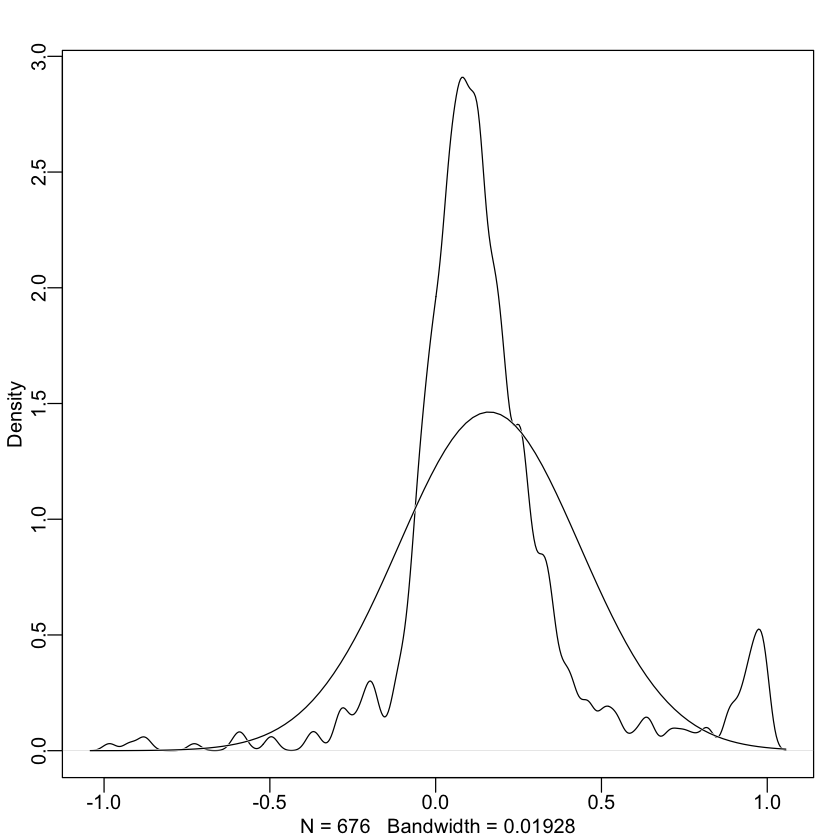

In [134]:
summary(df1$scoreCom)
dens(df1$scoreCom,norm.comp=TRUE)
sd(df1$scoreCom)

In [318]:
# Define them model
m1 <- alist(
    df1$scoreCom ~ dnorm(mu,sigma),
    mu ~ dnorm(0,3),
    sigma ~ dunif(0,10)
)

f1 <- quap(m1,data=df1)
precis(f1, prob=.95)

,mean,sd,2.5%,97.5%
,<dbl>,<dbl>,<dbl>,<dbl>
mu,0.1616401,0.010477511,0.1411045,0.1821756
sigma,0.2724170,0.007408269,0.2578970,0.2869369


In [319]:
save(f1, file = "20240614_PhD_LtrSen_01.RData")

### Now for letter segments

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.9907  0.0101  0.1202  0.1425  0.2468  0.9955 

[1] 0.2905867

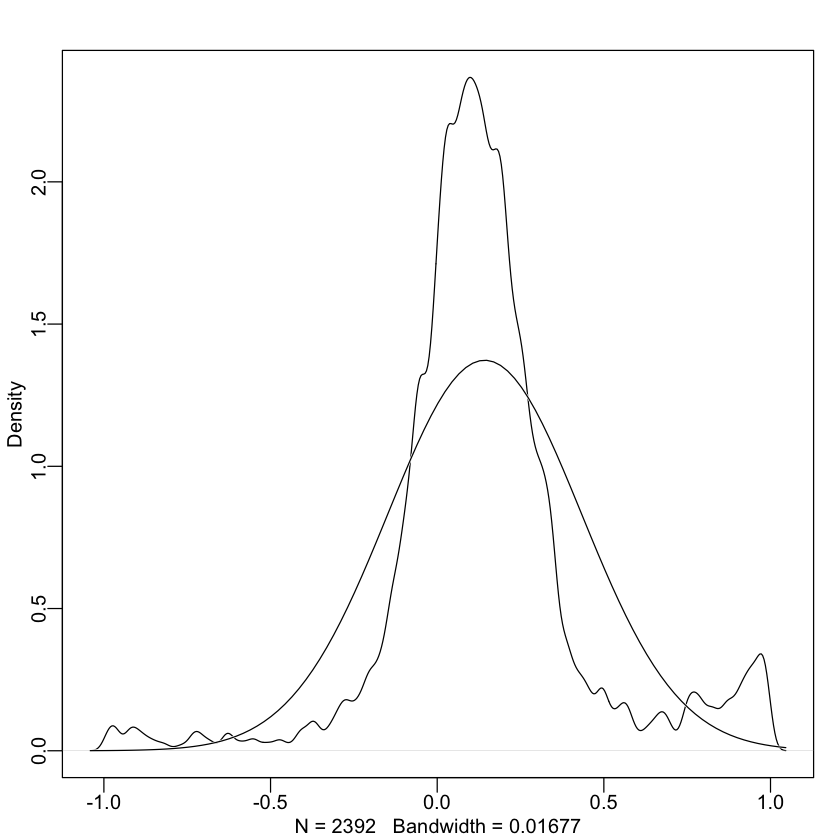

In [137]:
summary(df2$scoreCom)
dens(df2$scoreCom,norm.comp=TRUE)
sd(df2$scoreCom)

In [320]:
# Define them model
m2 <- alist(
    df2$scoreCom ~ dnorm(mu,sigma),
    mu ~ dnorm(0,3),
    sigma ~ dunif(0,10)
)

f2 <- quap(m2,data=df2)
precis(f2, prob=.95)

,mean,sd,2.5%,97.5%
,<dbl>,<dbl>,<dbl>,<dbl>
mu,0.142535,0.005940274,0.1308923,0.1541777
sigma,0.290528,0.004200237,0.2822957,0.2987603


In [321]:
save(f2, file = "20240614_PhD_LtrChkSen_01.RData")

Code below adapted from file:///Users/alaynemoody/Dropbox/SOCI620_Resources/20200310_PM_Code17.html

## Topics

### First for whole letters

$$letterTopics_i \sim Cat(softmax(topic_{1i}, topic_{2i}, ... , topic_{ki})$$
$$topic_{1i} = 0$$
$$topic_{2i}, ... ,topic_{ki} = \alpha_{topic_2}, ... ,\alpha_{topic_k} $$
$$\alpha_{topic_2}, ... , \alpha_{topic_k} \sim Norm(0,2)$$

In [352]:
# Get counts for topic number
table(as.factor(df1$topicNumber))

# Create new variable with topic labels that match pyLDAvis label numbers
df1$topicLabel <- as.character(df1$topicNumber)
df1$topicLabel[df1$topicLabel=="0"]  <- "01 Correspondence"
df1$topicLabel[df1$topicLabel=="1"]  <- "02 Money and Government"
df1$topicLabel[df1$topicLabel=="2"]  <- "03 People"
df1$topicLabel[df1$topicLabel=="3"]  <- "04 Contemplation"
df1$topicLabel[df1$topicLabel=="4"]  <- "05 Setting"
df1$topicLabel[df1$topicLabel=="5"]  <- "06 Farming"
df1$topicLabel[df1$topicLabel=="6"]  <- "07 Routines"
df1$topicLabel[df1$topicLabel=="7"]  <- "08 Family Life"
df1$topicLabel <- as.factor(df1$topicLabel)

# Check
df1 %>% 
select(topicNumber, topicLabel) %>% 
unique() %>% 
arrange(topicLabel)

table(df1$topicLabel)
sum(is.na(df1$topicLabel))


  0   1   2   3   4   5   6   7 
 68  56 117  71  50  96  50 168 

topicNumber,topicLabel
<int>,<fct>
0,01 Correspondence
1,02 Money and Government
2,03 People
3,04 Contemplation
4,05 Setting
5,06 Farming
6,07 Routines
7,08 Family Life



      01 Correspondence 02 Money and Government               03 People 
                     68                      56                     117 
       04 Contemplation              05 Setting              06 Farming 
                     71                      50                      96 
            07 Routines          08 Family Life 
                     50                     168 

[1] 0

In [141]:
m3 <- alist(
  topicLabel ~ dcategorical(softmax(t_01Correspondence,
                                    t_02MoneyGovernment, 
                                      t_03People,
                                      t_04Contemplation,
                                      t_05Setting,
                                      t_06Farming,
                                      t_07Routines,
                                      t_08FamilyLife)),
    t_01Correspondence <- a_01Correspondence,
    t_02MoneyGovernment <- a_02MoneyGovernment,
    t_03People <- a_03People,
    t_04Contemplation <- a_04Contemplation, 
    t_05Setting <- a_05Setting, 
    t_06Farming <- a_06Farming, 
    t_07Routines <- a_07Routines, 
    t_08FamilyLife <- a_08FamilyLife,
  
    c(a_01Correspondence,
      a_02MoneyGovernment, 
    a_03People,
    a_04Contemplation,
    a_05Setting,
    a_06Farming,
    a_07Routines,
    a_08FamilyLife) ~ dnorm(0,2)
) #(0219 Code 7, 2015 McElreath 10.58)

In [142]:
# Give it starting values
st <- list(a_01Correspondence = 0,
           a_02MoneyGovernment = 0, 
    a_03People = 0,
    a_04Contemplation = 0,
    a_05Setting = 0,
    a_06Farming = 0,
    a_07Routines = 0,
    a_08FamilyLife = 0)

In [143]:
f3 <- quap(m3,data=df1, start = st)
precis(f3,prob=.95)

,mean,sd,2.5%,97.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a_01Correspondence,-0.12829196,0.7160437,-1.5317119,1.2751280
a_02MoneyGovernment,-0.32149061,0.7176696,-1.7280971,1.0851159
a_03People,0.41302965,0.7128379,-0.9841070,1.8101663
a_04Contemplation,-0.08529112,0.7157220,-1.4880804,1.3174982
a_05Setting,-0.43409330,0.7187693,-1.8428552,0.9746686
a_06Farming,0.21551835,0.7138149,-1.1835332,1.6145699
a_07Routines,-0.43409330,0.7187693,-1.8428552,0.9746686
a_08FamilyLife,0.77452658,0.7114771,-0.6199429,2.1689961


In [144]:
# Check to make sure the predicted probabilities amount to 1

# get the predicted coefficients
cf <- coef(f3)

t1 <- c(cf['a_01Correspondence'],
        cf['a_02MoneyGovernment'],
        cf['a_03People'],
        cf['a_04Contemplation'],
        cf['a_05Setting'],
        cf['a_06Farming'],
        cf['a_07Routines'],
        cf['a_08FamilyLife']       
)

p1 <- softmax(t1[[1]],t1[[2]],t1[[3]],t1[[4]], t1[[5]], t1[[6]], t1[[7]], t1[[8]])
sum(p1)

[1] 1

In [145]:
# Put the predicted probablities into a table
names(p1) <- c('Correspondence',
               "Money Government",
               "People",
               "Contemplation",
               "Setting",
               "Farming",
               "Routines",
               "Family Life")

p1 <- round(p1, digits = 2)
topicVis  <- t(data.frame(as.list(p1)))
colnames(topicVis)  <-  "Probability"
topicVis

,Probability
Correspondence,0.10
Money.Government,0.08
People,0.17
Contemplation,0.11
Setting,0.07
Farming,0.14
Routines,0.07
Family.Life,0.25


Rows: 8
Columns: 1
$ Probability <dbl> 0.10, 0.08, 0.17, 0.11, 0.07, 0.14, 0.07, 0.25


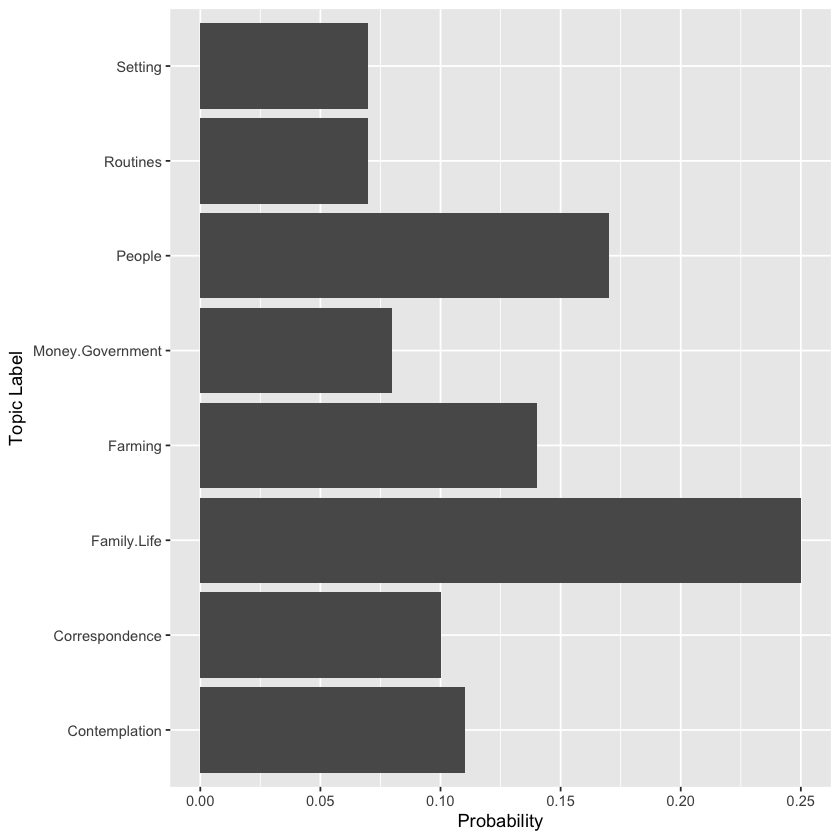

In [146]:
# Make a graph

topicVis <- as.data.frame(topicVis)
glimpse(topicVis)

# Barplot
p  <- ggplot(topicVis, aes(x=rownames(topicVis), y=Probability)) + 
  geom_bar(stat = "identity") +
  coord_flip() + xlab("Topic Label")
p

In [147]:
ggsave("20240614_PhD_LtrTop01.png")

Saving 7 x 7 in image


In [148]:
save(f3, file = "20240614_PhD_LtrTop_01.RData")

In [149]:
#comp <- complete.cases(df1[c('topicLabelR')])

### Now for letter segments

In [353]:
# Get counts for topic number
table(as.factor(df2$topicNumber))

# Create new variable with topic labels that match pyLDAvis label numbers
df2$topicLabel <- as.character(df2$topicNumber)
df2$topicLabel[df2$topicLabel=="0"]  <- "01 Weather"
df2$topicLabel[df2$topicLabel=="1"]  <- "02 Money"
df2$topicLabel[df2$topicLabel=="2"]  <- "03 Farming"
df2$topicLabel[df2$topicLabel=="3"]  <- "04 Correspondence"
df2$topicLabel[df2$topicLabel=="4"]  <- "05 People"
df2$topicLabel[df2$topicLabel=="5"]  <- "06 Setting"
df2$topicLabel[df2$topicLabel=="6"]  <- "07 Contemplation"
df2$topicLabel[df2$topicLabel=="7"]  <- "08 Family Life"
df2$topicLabel[df2$topicLabel=="8"]  <- "09 Travel"
df2$topicLabel[df2$topicLabel=="9"]  <- "10 Difficulty"
df2$topicLabel[df2$topicLabel=="10"]  <- "11 Government"
df2$topicLabel <- as.factor(df2$topicLabel)

# Check
df2 %>% 
select(topicNumber, topicLabel) %>% 
unique() %>% 
arrange(topicLabel)

table(df2$topicLabel)
sum(is.na(df2$topicLabel))


  0   1   2   3   4   5   6   7   8   9  10 
173 159 227 299 266 182 171 292 147 262 214 

topicNumber,topicLabel
<int>,<fct>
0,01 Weather
1,02 Money
2,03 Farming
3,04 Correspondence
4,05 People
5,06 Setting
6,07 Contemplation
7,08 Family Life
8,09 Travel



       01 Weather          02 Money        03 Farming 04 Correspondence 
              173               159               227               299 
        05 People        06 Setting  07 Contemplation    08 Family Life 
              266               182               171               292 
        09 Travel     10 Difficulty     11 Government 
              147               262               214 

[1] 0

In [151]:
m4 <- alist(
  topicLabel ~ dcategorical(softmax(t_01Weather,
                                    t_02Money, 
                                      t_03Farming,
                                      t_04Correspondence,
                                      t_05People,
                                      t_06Setting,
                                      t_07Contemplation,
                                      t_08FamilyLife,
                                      t_09Travel,
                                      t_10Difficulty,
                                      t_11Government)),
    t_01Weather <- a_01Weather,
    t_02Money <- a_02Money,
    t_03Farming <- a_03Farming,
    t_04Correspondence <- a_04Correspondence, 
    t_05People <- a_05People, 
    t_06Setting <- a_06Setting, 
    t_07Contemplation <- a_07Contemplation, 
    t_08FamilyLife <- a_08FamilyLife,
    t_09Travel <- a_09Travel, 
    t_10Difficulty <- a_10Difficulty, 
    t_11Government <- a_11Government,    
  
    c(a_01Weather,
      a_02Money, 
    a_03Farming,
    a_04Correspondence,
    a_05People,
    a_06Setting,
    a_07Contemplation,
    a_08FamilyLife,
    a_09Travel,
    a_10Difficulty,
    a_11Government) ~ dnorm(0,2)
) #(0219 Code 7, 2015 McElreath 10.58)

In [152]:
# Give it starting values
st <- list(a_01Weather = 0,
           a_02Money = 0, 
    a_03Farming = 0,
    a_04Correspondence = 0,
    a_05People = 0,
    a_06Setting = 0,
    a_07Contemplation = 0,
    a_08FamilyLife = 0,
    a_09Travel = 0,
    a_10Difficulty = 0,
    a_11Government = 0)

In [153]:
f4 <- quap(m4,data=df2, start = st)
precis(f4,prob=.95)

,mean,sd,2.5%,97.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a_01Weather,-0.19913959,0.6072890,-1.3894041,0.9911249
a_02Money,-0.28337234,0.6076300,-1.4743052,0.9075605
a_03Farming,0.07214840,0.6063657,-1.1163065,1.2606033
a_04Correspondence,0.34743099,0.6056514,-0.8396240,1.5344860
a_05People,0.23056108,0.6059310,-0.9570419,1.4181640
a_06Setting,-0.14850653,0.6070973,-1.3383953,1.0413823
a_07Contemplation,-0.21074874,0.6073343,-1.4011021,0.9796046
a_08FamilyLife,0.32375556,0.6057055,-0.8634054,1.5109165
a_09Travel,-0.36167765,0.6079735,-1.5532838,0.8299285


In [154]:
# Check to make sure the predicted probabilities amount to 1

# get the predicted coefficients
cf <- coef(f4)

t1 <- c(cf['a_01Weather'],
        cf['a_02Money'],
        cf['a_03Farming'],
        cf['a_04Correspondence'],
        cf['a_05People'],
        cf['a_06Setting'],
        cf['a_07Contemplation'],
        cf['a_08FamilyLife'],
        cf['a_09Travel'],
        cf['a_10Difficulty'],
        cf['a_11Government']
)

p1 <- softmax(t1[[1]],t1[[2]],t1[[3]],t1[[4]], t1[[5]], t1[[6]], t1[[7]], t1[[8]], t1[[9]], t1[[10]], t1[[11]])
sum(p1)

[1] 1

In [155]:
# Put the predicted probablities into a table
names(p1) <- c('Weather',
               "Money",
               "Farming",
               "Correspondence",
               "People",
               "Setting",
               "Contemplation",
               "Family Life",
               "Travel",
               "Difficulty",
               "Government"
              )

p1 <- round(p1, digits = 2)
topicVis  <- t(data.frame(as.list(p1)))
colnames(topicVis)  <-  "Probability"
topicVis

,Probability
Weather,0.07
Money,0.07
Farming,0.09
Correspondence,0.12
People,0.11
Setting,0.08
Contemplation,0.07
Family.Life,0.12
Travel,0.06
Difficulty,0.11


Rows: 11
Columns: 1
$ Probability <dbl> 0.07, 0.07, 0.09, 0.12, 0.11, 0.08, 0.07, 0.12, 0.06, 0.11…


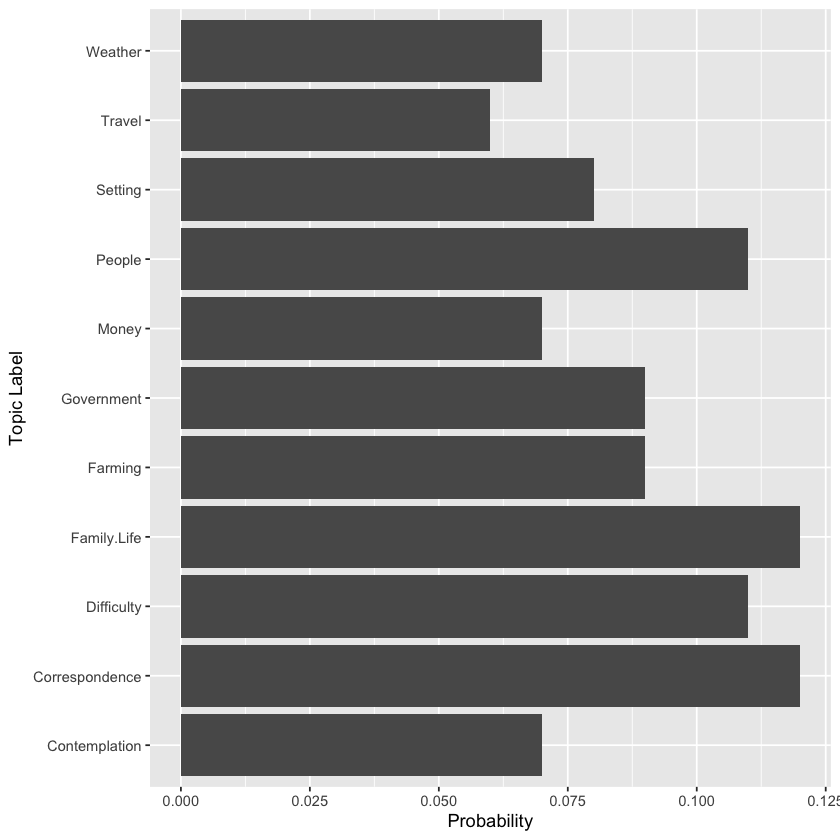

In [156]:
# Make a graph

topicVis <- as.data.frame(topicVis)
glimpse(topicVis)

# Barplot
p  <- ggplot(topicVis, aes(x=rownames(topicVis), y=Probability)) + 
  geom_bar(stat = "identity") +
  coord_flip() + xlab("Topic Label")
p

In [157]:
ggsave("20240614_PhD_LtrChkTop01.png")

Saving 7 x 7 in image


In [158]:
save(f4, file = "20240614_PhD_LtrChkTop_01.RData")

## Socials

$$socialRates_i \sim Norm(\mu, \sigma)$$
$$\mu \sim Norm(0, 1)$$
$$\sigma \sim Unif(0, 10)$$

### First, in whole letters

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.02125 0.03659 0.03798 0.05284 0.12422 

[1] 0.02302023

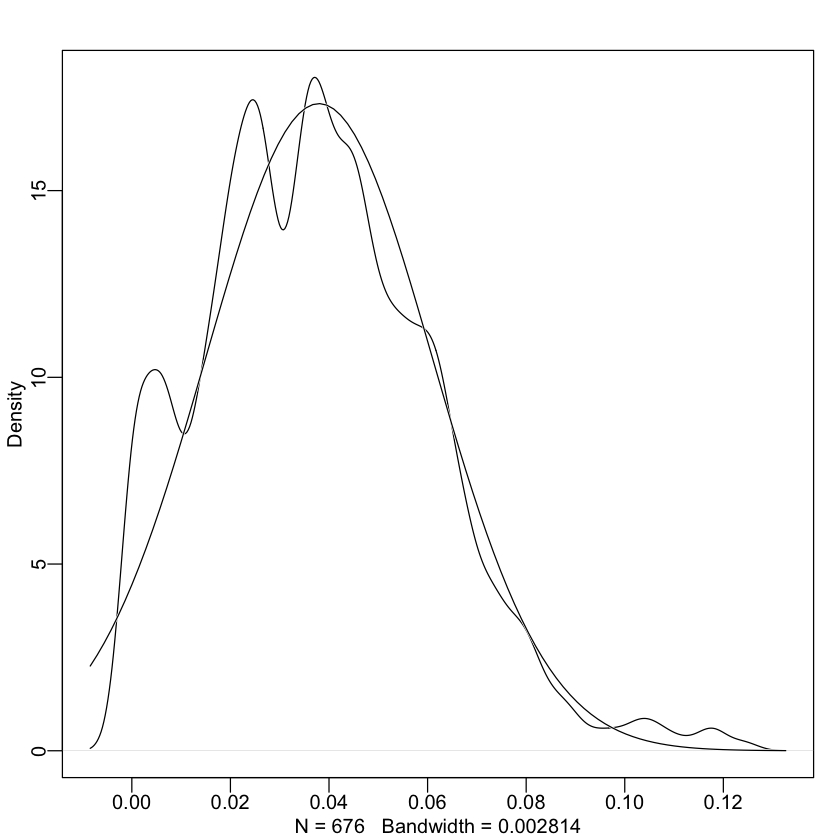

In [7]:
# Create a new token that reflects the rate of unique indivudals relative to unique tokens
df1$indsRate <- df1$indsTot/df1$uniqueTokens
summary(df1$indsRate)
dens(df1$indsRate,norm.comp=TRUE)
sd(df1$indsRate)

In [323]:
# Define them model
m5 <- alist(
    df1$indsRate ~ dnorm(mu,sigma),
    mu ~ dnorm(0,1),
    sigma ~ dunif(0,10)
)

f5 <- quap(m5,data=df1)
precis(f5, prob=.95)

,mean,sd,2.5%,97.5%
,<dbl>,<dbl>,<dbl>,<dbl>
mu,0.03797783,0.0008848595,0.03624353,0.03971212
sigma,0.02300636,0.0006205062,0.02179019,0.02422253


In [326]:
save(f5, file = "20240616_PhD_LtrSocI_01.RData")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.02119 0.03425 0.03661 0.04972 0.12676 

[1] 0.02080769

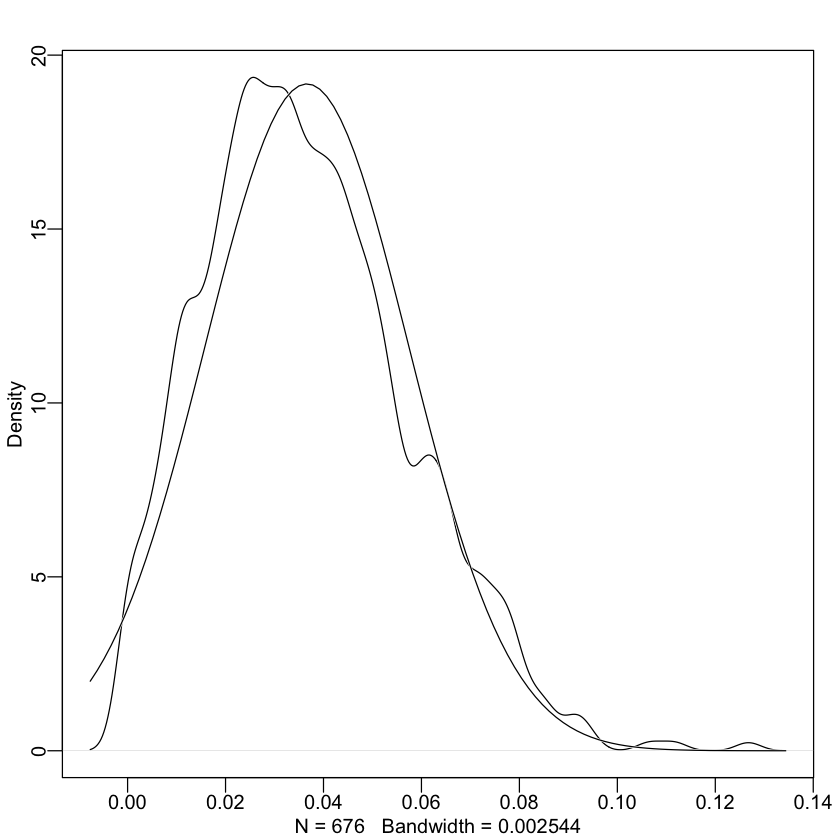

In [327]:
# Create a new token that reflects the rate of 1st person pronouns relative to total tokens
df1$fppAllRate <- df1$fppAll_Ct/df1$totalTokens
summary(df1$fppAllRate)
dens(df1$fppAllRate,norm.comp=TRUE)
sd(df1$fppAllRate)

In [328]:
# Define them model
m6 <- alist(
    df1$fppAllRate ~ dnorm(mu,sigma),
    mu ~ dnorm(0,1),
    sigma ~ dunif(0,10)
)

f6 <- quap(m6,data=df1)
precis(f6, prob=.95)

,mean,sd,2.5%,97.5%
,<dbl>,<dbl>,<dbl>,<dbl>
mu,0.03661249,0.0008012405,0.03504209,0.03818289
sigma,0.02083226,0.0005623095,0.01973015,0.02193437


In [329]:
save(f6, file = "20240616_PhD_LtrSocF_01.RData")

### Now, in letter segments

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.007491 0.018051 0.021581 0.032609 0.142857 

[1] 0.01807528

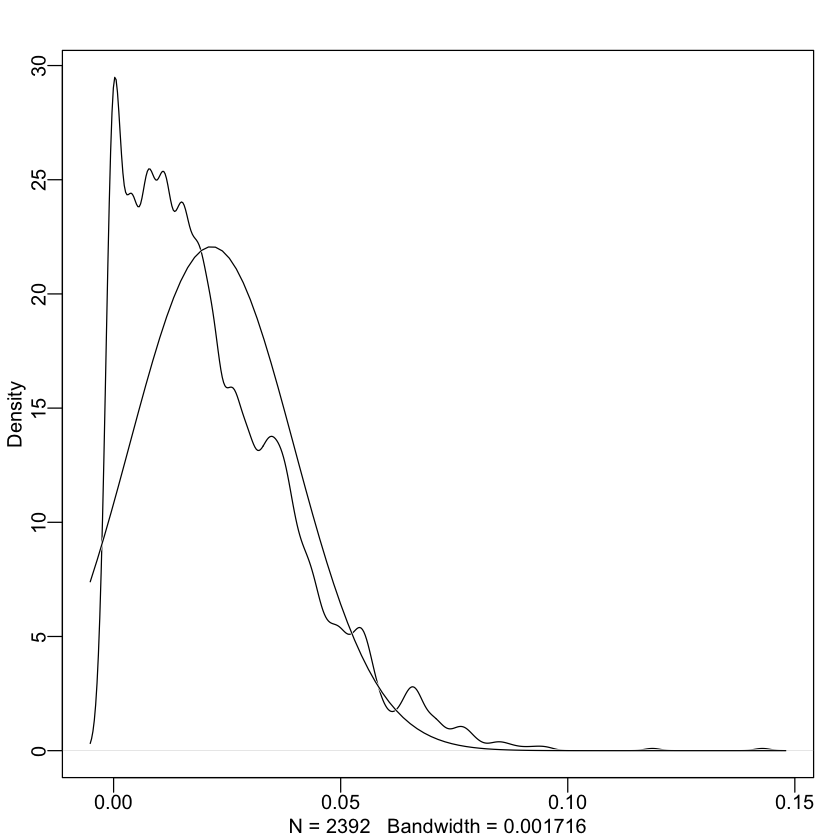

In [330]:
# Create a new token that reflects the rate of total indivudals relative to total tokens
df2$mentsRate <- df2$mentsTot/df2$totalTokens
summary(df2$mentsRate)
dens(df2$mentsRate,norm.comp=TRUE)
sd(df2$mentsRate)

In [331]:
# Define them model
m7 <- alist(
    df2$mentsRate ~ dnorm(mu,sigma),
    mu ~ dnorm(0,1),
    sigma ~ dunif(0,10)
)

f7 <- quap(m7,data=df2)
precis(f7, prob=.95)

,mean,sd,2.5%,97.5%
,<dbl>,<dbl>,<dbl>,<dbl>
mu,0.02158117,0.0003704399,0.02085512,0.02230721
sigma,0.01811750,0.0002593399,0.01760921,0.01862580


In [332]:
save(f7, file = "20240616_PhD_LtrChkSocM_01.RData")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01916 0.03455 0.03673 0.05186 0.13158 

[1] 0.02287245

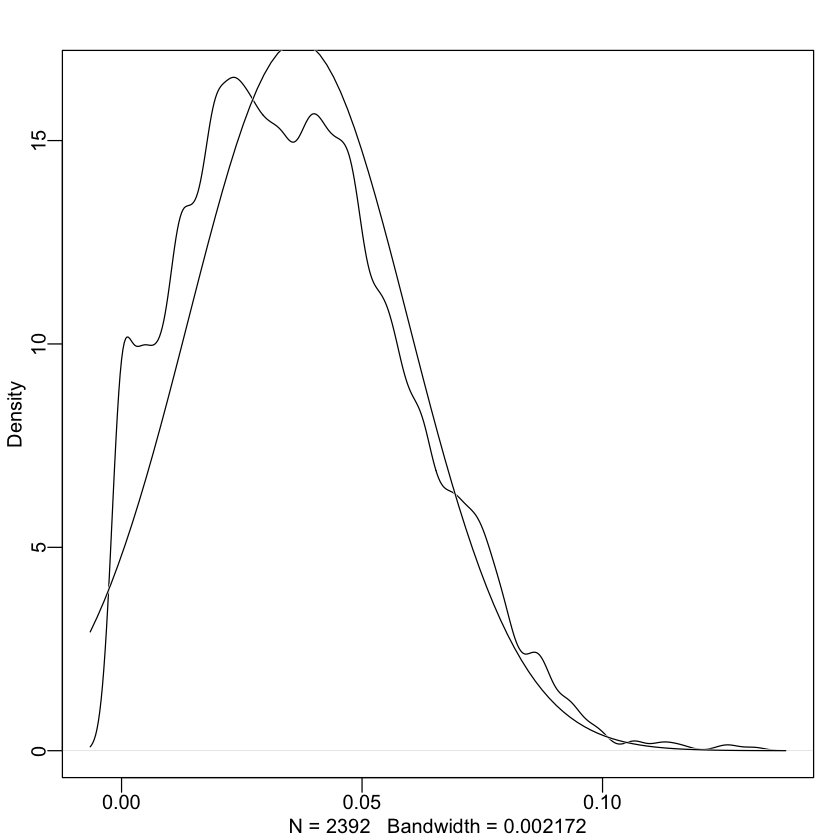

In [333]:
# Create a new token that reflects the rate of all 1st person pronouns relative to total tokens
df2$fppAllRate <- df2$fppAll_Ct/df2$totalTokens
summary(df2$fppAllRate)
dens(df2$fppAllRate,norm.comp=TRUE)
sd(df2$fppAllRate)

In [334]:
# Define them model
m8 <- alist(
    df2$fppAllRate ~ dnorm(mu,sigma),
    mu ~ dnorm(0,1),
    sigma ~ dunif(0,10)
)

f8 <- quap(m8,data=df2)
precis(f8, prob=.95)

,mean,sd,2.5%,97.5%
,<dbl>,<dbl>,<dbl>,<dbl>
mu,0.03672637,0.0004683041,0.03580851,0.03764423
sigma,0.02290385,0.0003290815,0.02225887,0.02354884


In [335]:
save(f8, file = "20240616_PhD_LtrChkSocF_01.RData")